In [42]:
# Importaciones necesarias
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay    # Import Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests                       # Import requests library to make HTTP requests in Python easily.
import pandas as pd                   # Import pandas for data manipulation and analysis.
from scipy.spatial.distance import pdist, squareform  # Import distance functions from scipy.spatial.distance
import os


       id Tipo    X    Y  Z
0       1    B  105   81  0
1       1    B  106   81  0
2       1    B  107   81  0
3       1    B  108   81  0
4       1    B  103   82  0
...   ...  ...  ...  ... ..
7413  164    B  151  180  0
7414  164    B  152  180  0
7415  160    B  122  181  0
7416  160    B  123  181  0
7417  160    B  124  181  0

[7418 rows x 5 columns]


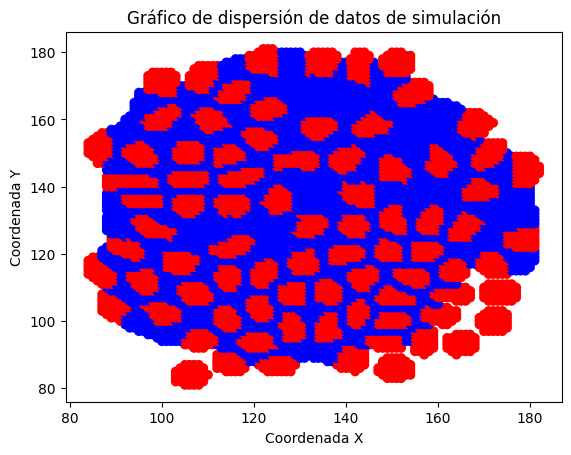

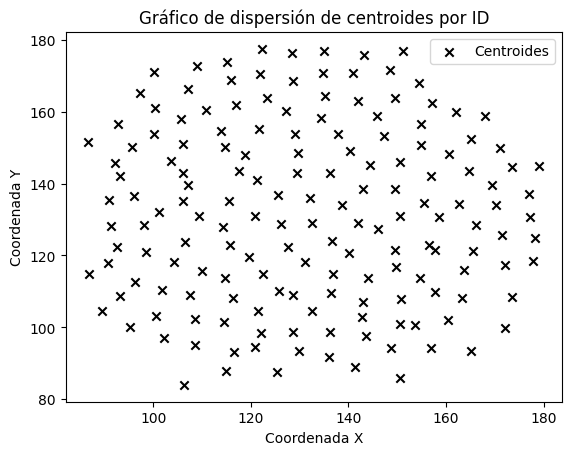

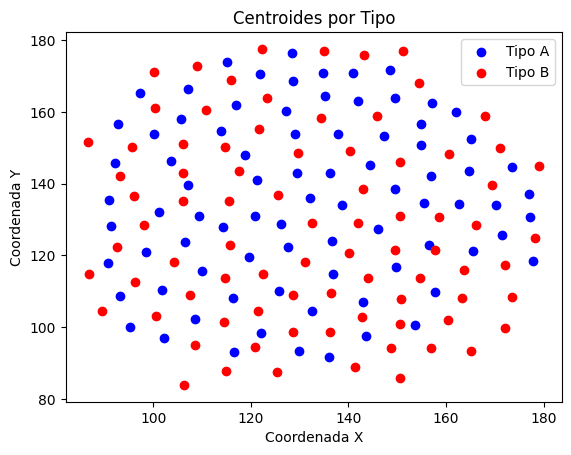

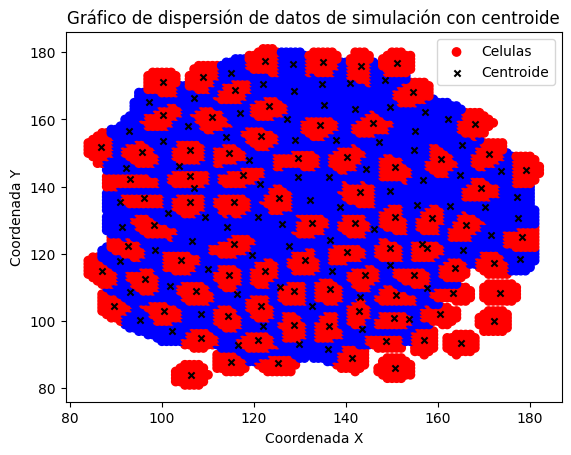

     centroides_x  centroides_y tipo
0      106.255814     83.953488    B
1      114.928571     87.952381    B
2      125.272727     87.477273    B
3      129.888889     93.266667    A
4      136.000000     91.630435    A
..            ...           ...  ...
159    122.363636    177.522727    B
160    128.391304    176.500000    A
161    134.909091    177.045455    B
162    143.170732    175.804878    B
163    151.146341    176.853659    B

[164 rows x 3 columns]
[ 9.55028084 19.34063206 25.40191963 ...  8.3542647  16.23838327
  8.04427072]
Máximo: 103.1775221485333, Mínimo: 1.7545502170464533, Promedio: 44.818909467516924


In [73]:
# Cargar datos desde un archivo CSV
url = "~/celulas/csv/3.csv"
df = pd.read_csv(url, header=None)
df.head(5)

# Asignar nombres a las columnas
nombres_columnas = ['id', "Tipo", 'X', 'Y', "Z"]  # Reemplaza con los nombres que correspondan
df.columns = nombres_columnas

# Mostrar el DataFrame
print(df)

# Extraer las coordenadas X e Y y el tipo
X = df['X']
Y = df['Y']
tipo = df['Tipo']
id1 = df['id']

# Crear un mapa de colores basado en los tipos
colores = {'A': 'b', 'B': 'r'}  # Ajusta los colores a cada tipo
colores_puntos = [colores[t] for t in tipo]

# Crear y guardar el gráfico de dispersión inicial
plt.scatter(X, Y, c=colores_puntos)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación')
if not path.exists('Datos_im'):
    makedirs('Datos_im')
plt.savefig(f'Datos_im/grafico_dispersion_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID
grupos = df.groupby('id')

# Inicializar listas para almacenar los centroides
centroides_x = []
centroides_y = []

# Calcular el centroide para cada grupo
for id_grupo, grupo in grupos:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)

# Crear y guardar el gráfico de dispersión solo con los centroides
plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides')  # Agregar los centroides al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de centroides por ID')
plt.legend()  # Mostrar la leyenda con la etiqueta de los centroides
plt.savefig(f'Datos_im/grafico_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID y el Tipo
grupos_tipo = df.groupby(['id', 'Tipo'])

# Inicializar listas para almacenar los centroides y tipos
centroides_x = []
centroides_y = []
tipos_centroides = []

# Calcular el centroide y el tipo para cada grupo
for (id_grupo, tipo_grupo), grupo in grupos_tipo:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)
    tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo

# Crear y guardar el gráfico de dispersión con centroides por tipo
for tipo in set(tipos_centroides):
    color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
    indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
    centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
    centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
    plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Centroides por Tipo')
plt.legend()
plt.savefig(f'Datos_im/grafico_centroides_tipo_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear y guardar el gráfico de dispersión combinado
plt.scatter(X, Y, c=colores_puntos, label='Celulas')
plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=20, label='Centroide')  # Agregar el centroide al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación con centroide')
plt.legend() 
plt.savefig(f'Datos_im/grafico_dispersion_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear DataFrame con los centroides y tipos
df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y, "tipo": tipos_centroides})
print(df_centroides)

# Guardar el DataFrame de centroides en un archivo CSV
output_dir = 'centroides'
if not path.exists(output_dir):
    makedirs(output_dir)
input_filename = path.basename(url)
output_filename = f"{output_dir}/centroides_{input_filename}"
df_centroides.to_csv(output_filename, index=False)

# Matriz de distancias
matrix_distance = pdist(df_centroides[['centroides_x', 'centroides_y']], metric='euclidean')
print(matrix_distance)

# Estadísticas de la matriz de distancias
maximo = matrix_distance.max()
minimo = matrix_distance.min()
promedio = matrix_distance.mean()
print(f"Máximo: {maximo}, Mínimo: {minimo}, Promedio: {promedio}")


[(1, (9.731738323620817, inf)), (1, (6.73060489879981, inf)), (1, (6.793134232633741, inf)), (1, (6.853276853310252, inf)), (1, (6.8632596477676335, inf)), (1, (7.009075083061647, inf)), (1, (7.01001222382133, inf)), (1, (7.0276543412275485, inf)), (1, (7.047778895970245, inf)), (1, (7.216576452476927, inf)), (1, (7.249622065434182, inf)), (1, (7.281567654370343, inf)), (1, (7.618406884433922, inf)), (1, (7.99940182235067, inf)), (1, (8.286027943060958, inf)), (1, (6.922796617583406, 9.86094317353144)), (1, (7.002004492877008, 9.909480351957335)), (1, (7.088165251358816, 9.847540280821292)), (1, (6.940584010780227, 9.68462482833458)), (1, (7.029729773927615, 9.67689548395726)), (1, (6.63556772173327, 9.268926657865466)), (1, (7.075479024238718, 9.634883562234132)), (1, (6.660718527609124, 9.115698851972116)), (1, (7.367340786358771, 9.679569671995814)), (1, (7.1685640349973925, 9.297846416793327)), (1, (7.650819401163614, 9.752359045094906)), (1, (7.1838149631463555, 9.270106058733589)

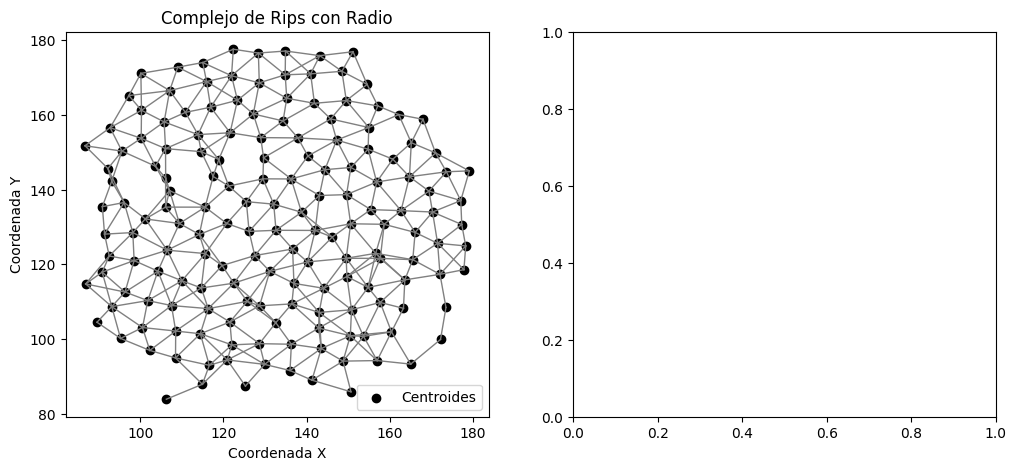

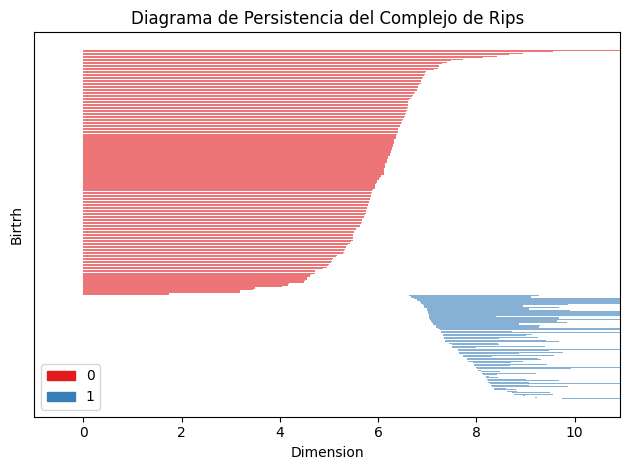

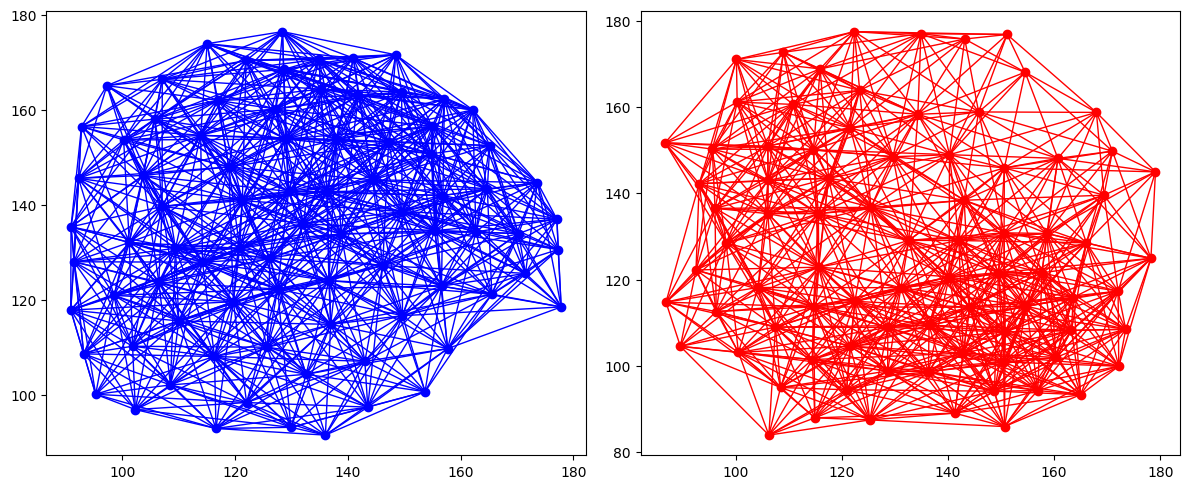

[(1, (9.387796997735117, 15.337852096467902)), (1, (10.927940997481834, 16.207532299110145)), (1, (9.78899641845321, 14.525294095044949)), (1, (10.665969627430922, 14.989987230140109)), (1, (9.01547898382488, 12.886495364861322)), (1, (9.847540280821292, 13.53124325182372)), (1, (9.770582508169001, 13.349936543328075)), (1, (9.115698851972116, 12.380758963535074)), (1, (11.690673346892869, 14.927470481892348)), (1, (7.895688213266209, 10.814055131748566)), (1, (9.339175320407097, 12.231211513327235)), (1, (10.546404516701609, 13.328968915324202)), (1, (10.050342794043281, 12.814117025331418)), (1, (10.491403831344652, 13.061059310180015)), (1, (10.012484515098235, 12.417575470097034)), (1, (11.109529647891057, 13.408561140929852)), (1, (8.985072612249365, 11.26609953925004)), (1, (11.036347469200953, 13.25904349850495)), (1, (11.242442353305158, 13.234853112294509)), (1, (9.907060103379582, 11.810308876584442)), (1, (12.216164990376807, 14.009299533820982)), (1, (10.76955030065119, 12.

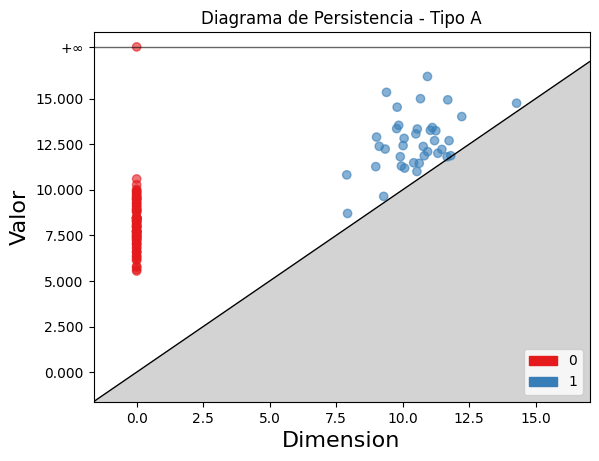

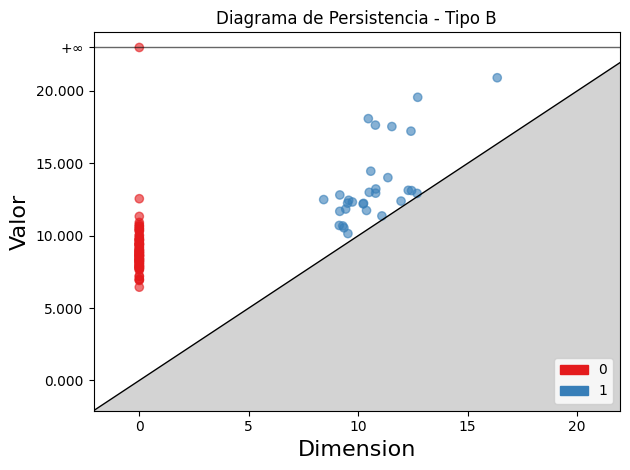

In [62]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

# Función para guardar datos en un archivo CSV en la carpeta especificada
def guardar_csv(data, filename):
    # Si la carpeta no existe, crearla
    if not os.path.exists('diagramas_persistencia'):
        os.makedirs('diagramas_persistencia')
    # Guardar el DataFrame en un archivo CSV
    data.to_csv(os.path.join('diagramas_persistencia', filename), index=False)
    
# Crear carpeta para guardar las imágenes si no existe
if not os.path.exists('diagramas_persistencia_imagenes'):
    os.makedirs('diagramas_persistencia_imagenes')

# Definir colores para cada tipo
colores = {1: 'red', 2: 'blue'}

# Convertir las coordenadas de los centroides a un formato adecuado para gudhi
puntos = np.array(list(zip(centroides_x, centroides_y)))

# Calcular el complejo de Rips con un radio específico
rips_complex = gd.RipsComplex(points=puntos, max_edge_length=10)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

# Visualizar el complejo de Rips
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [centroides_x[i] for i in arista]
        y = [centroides_y[i] for i in arista]
        plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Complejo de Rips con Radio')
plt.legend()

# Calcular el diagrama de persistencia
diag = simplex_tree.persistence()
print(diag)

# Mostrar el diagrama de persistencia
plt.subplot(1, 2, 2)
gd.plot_persistence_barcode(diag)
plt.title('Diagrama de Persistencia del Complejo de Rips')
plt.xlabel('Dimension')
plt.ylabel('Birtrh')
plt.savefig(f'diagramas_persistencia_imagenes/Diagrama_de_Persistencia_{path.basename(url)}.png')
plt.tight_layout()
plt.show()

# Separar los centroides por tipo
centroides_tipo_A = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'A']
centroides_tipo_B = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'B']

# Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
puntos_tipo_A = np.array(centroides_tipo_A)
puntos_tipo_B = np.array(centroides_tipo_B)

# Calcular el complejo de Rips con un radio específico para cada tipo
rips_complex_tipo_A = gd.RipsComplex(points=puntos_tipo_A, max_edge_length=30)
rips_complex_tipo_B = gd.RipsComplex(points=puntos_tipo_B, max_edge_length=30)

# Generar un diagrama simplicial para cada tipo
diagrama_simplicial_tipo_A = rips_complex_tipo_A.create_simplex_tree(max_dimension=3).get_skeleton(3)
diagrama_simplicial_tipo_B = rips_complex_tipo_B.create_simplex_tree(max_dimension=3).get_skeleton(3)

# Visualizar los diagramas simpliciales para cada tipo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for simplex in diagrama_simplicial_tipo_A:
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_A[i][0] for i in arista]
        y = [puntos_tipo_A[i][1] for i in arista]
        plt.plot(x, y, color='blue', linestyle='-', linewidth=1)  # Color rojo para tipo A
plt.scatter(puntos_tipo_A[:, 0], puntos_tipo_A[:, 1], color='blue', label='Tipo A')

plt.subplot(1, 2, 2)
for simplex in diagrama_simplicial_tipo_B:
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_B[i][0] for i in arista]
        y = [puntos_tipo_B[i][1] for i in arista]
        plt.plot(x, y, color='red', linestyle='-', linewidth=1)  # Color azul para tipo B
plt.scatter(puntos_tipo_B[:, 0], puntos_tipo_B[:, 1], color='red', label='Tipo B')

plt.tight_layout()
plt.show()

# Calcular los diagramas de persistencia para cada tipo
diag_persistencia_tipo_A = rips_complex_tipo_A.create_simplex_tree(max_dimension=3).persistence()
diag_persistencia_tipo_B = rips_complex_tipo_B.create_simplex_tree(max_dimension=3).persistence()
print(diag_persistencia_tipo_A)
print(diag_persistencia_tipo_B)
# Mostrar los diagramas de persistencia para cada tipo
gd.plot_persistence_diagram(diag_persistencia_tipo_A)
plt.title('Diagrama de Persistencia - Tipo A')
plt.xlabel('Dimension')
plt.savefig(f'diagramas_persistencia_imagenes/Diagrama_de_Persistencia_A_{path.basename(url)}.png')
plt.ylabel('Valor')


gd.plot_persistence_diagram(diag_persistencia_tipo_B)
plt.title('Diagrama de Persistencia - Tipo B')
plt.xlabel('Dimension')
plt.ylabel('Valor')
plt.savefig(f'diagramas_persistencia_imagenes/Diagrama_de_Persistencia_B_{path.basename(url)}.png')
plt.tight_layout()
plt.show()



# Convertir diag_persistencia_tipo_A a DataFrame
df_diag = pd.DataFrame(diag, columns=['Dimension', 'Birth'])

# Guardar diag_persistencia_tipo_A en un archivo CSV
guardar_csv(df_diag, f'diag_persistencia_{nombre_archivo}.csv')

# Convertir diag_persistencia_tipo_A a DataFrame
df_diag_persistencia_tipo_A = pd.DataFrame(diag_persistencia_tipo_A, columns=['Dimension', 'Birth'])

# Guardar diag_persistencia_tipo_A en un archivo CSV
guardar_csv(df_diag_persistencia_tipo_A, f'diag_persistencia_tipo_A_{nombre_archivo}.csv')

# Convertir diag_persistencia_tipo_B a DataFrame
df_diag_persistencia_tipo_B = pd.DataFrame(diag_persistencia_tipo_B, columns=['Dimension', 'Birth'])

# Guardar diag_persistencia_tipo_B en un archivo CSV
guardar_csv(df_diag_persistencia_tipo_B, f'diag_persistencia_tipo_B_{nombre_archivo}.csv')

# Función para guardar los diagramas de persistencia como listas de tuplas
def guardar_listas_tuplas(diag, filename):
    # Si la carpeta no existe, crearla
    if not os.path.exists('diagramas_persistencia'):
        os.makedirs('diagramas_persistencia')
    
    # Guardar la lista de tuplas en un archivo de texto
    with open(os.path.join('diagramas_persistencia', filename), 'w') as f:
        for tupla in diag:
            f.write(str(tupla) + '\n')
            
# Guardar diag como lista de tuplas
guardar_listas_tuplas(diag, f'diag_persistencia_{nombre_archivo}.txt')

# Guardar diag_persistencia_tipo_A como lista de tuplas
guardar_listas_tuplas(diag_persistencia_tipo_A, f'diag_persistencia_tipo_A_{nombre_archivo}.txt')

# Guardar diag_persistencia_tipo_B como lista de tuplas
guardar_listas_tuplas(diag_persistencia_tipo_B, f'diag_persistencia_tipo_B_{nombre_archivo}.txt')

In [58]:
# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia del complejo (Tipo A y Tipo B)
distancia_bottleneck = gd.bottleneck_distance(diag_persistencia_tipo_A, diag_persistencia_tipo_B)
print("Distancia de Bottleneck:", distancia_bottleneck)

diag_persistencia_tipo_A_dim0 = simplex_tree_A.persistence_intervals_in_dimension(0)
diag_persistencia_tipo_B_dim0 = simplex_tree_B.persistence_intervals_in_dimension(0)

distancia_bottleneck_dim0 = gd.bottleneck_distance(diag_persistencia_tipo_A_dim0, diag_persistencia_tipo_B_dim0)
print("Distancia de Bottleneck en dimensión 0:", distancia_bottleneck_dim0)


#Distancia con dimensión 1 (Me da el mismo resultado que por default ¿)
diag_persistencia_tipo_A_dim1 = simplex_tree_A.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_B_dim1 = simplex_tree_B.persistence_intervals_in_dimension(1)

distancia_bottleneck_dim1 = gd.bottleneck_distance(diag_persistencia_tipo_A_dim1, diag_persistencia_tipo_B_dim1)

print("Distancia de Bottleneck en dimensión 1:", distancia_bottleneck_dim1)


Distancia de Bottleneck: 3.3520808231644317
Distancia de Bottleneck en dimensión 0: 1.9626777455177429
Distancia de Bottleneck en dimensión 1: 3.3520808231644317
